# Introduction à la Science des données



## Travail pratique 03 – Analyse Exploratoire des Données


### Table des matières

[Exercice 1: Pantheria, base de données d'animaux](#Exercice-1:-Pantheria,-base-de-données-d'animaux)
- [1.1 Lecture des données](#1.1-Lecture-des-données)
- [1.2 Exploration des masses des différents animaux](#1.2-Exploration-des-masses-des-différents-animaux)
- [1.3 Histogramme des masses corporelles](#1.3-Histogramme-des-masses-corporelles)
- [1.4 Min et Max](#1.4-Min-et-Max)
- [1.5 Choix perso](#1.5-Choix-perso)

[Exercice 2: Wine database - Analyse Exploratoire des données](##-Exercice-2:-Wine-database---Analyse-Exploratoire-des-données)
- [2.1 Questions](#2.1-Questions)
- [2.2 Lecture des données](#2.2-Lecture-des-données)
- [2.3 Boxplot groupé](#2.3-Boxplot-groupé)
- [2.4 Analyse des graphiques](#2.4-Analyse-des-graphiques)

[Exercice 3: Introduction au modèle à base de règles](#Exercice-3:-Introduction-au-modèle-à-base-de-règles)

***


**Informations de groupe:**

- Groupe: TP3-CD-16

- Edison Sahitaj
- Laurent Cornu

**Professeurs**: Carlos Peña et Stephan Robert

**Assistant(s)**: Thibault Schowing, Arthur Babey

**Emails**: edison.sahitaj@heig-vd.ch; laurent.cornu@heig-vd.ch

**Rendu**:

- Date: dimanche 19.11.2023, 23h55 (2 semaines)


- Une fois complété, rendez directement le notebook nommé correctement comme suit "**TP3_ISD_SA2023_Nom1_Nom2(_Nom3).ipynb**" en mettant les noms de famille de chacun des membres du groupe (pour ceux avec plusieurs noms de famille, vous pouvez mettre juste le premier)


- Mettez vos Prénoms et noms en entier ci-dessus (ou il est indiqué **A COMPLETER**). 


- Les questions sont généralement indiquées en **gras** ou par une liste d'instructrions et les endroits où répondre sont indiqués par un "*Réponse:*" pour les réponses textuelles. 


- Pour les réponses nécessitant d'écrire du code, les cellules ont déjà été crées et un commentaire indique où/quoi répondre. 


- Note: Ce TP est noté sur 6



<div class="alert alert-block alert-success">
<b>Objectifs </b>
</div>

- Pratiquer l'analyse exploratoire des données sur un premier set de données (PanTHERIA_1-0_WR05_Aug2008.txt)
- Réaliser l'analyse exploratoire des données sur un second set de données, en prévision du TP suivant, et commencer à comprendre les modèles à base de règles. 

<div class="alert alert-block alert-info">
<b>Corrections: </b> Ce notebook vous sera renvoyé via Cyberlearn ou  un autre canal. Les informations principales concernant les corrections seront indiquées après chaque section (banière bleue) avec le nombre de points. Il est possible que des remarques concernant le code soient directement ajoutées dans celui-ci.
</div>



In [7]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Exercice 1: Pantheria, base de données d'animaux



### 1.1 Lecture des données

(5 points)

Créez un DataFrame à partir du fichier CSV donné et explorez rapidement les données

- Utilisez la fonction read_csv() de Pandas pour lire le fichier *PanTHERIA_1-0_WR05_Aug2008.txt* dans un DataFrame. Utilisez le bon séparateur. 
- Utilisez la fonction head() pour avoir un aperçu des différentes colonnes et valeurs
- Répondez aux questions dans les cellules "*Réponse...*". 


In [14]:
# Lire le fichier dans un DataFrame
df = pd.read_csv("PanTHERIA_1-0_WR05_Aug2008.txt", sep="\t")

In [15]:
# Aperçu avec head(). 
print(df.head())


    MSW05_Order MSW05_Family MSW05_Genus MSW05_Species       MSW05_Binomial  \
0  Artiodactyla    Camelidae     Camelus   dromedarius  Camelus dromedarius   
1     Carnivora      Canidae       Canis       adustus        Canis adustus   
2     Carnivora      Canidae       Canis        aureus         Canis aureus   
3     Carnivora      Canidae       Canis       latrans        Canis latrans   
4     Carnivora      Canidae       Canis         lupus          Canis lupus   

   1-1_ActivityCycle  5-1_AdultBodyMass_g  8-1_AdultForearmLen_mm  \
0                3.0            492714.47                  -999.0   
1                1.0             10392.49                  -999.0   
2                2.0              9658.70                  -999.0   
3                2.0             11989.10                  -999.0   
4                2.0             31756.51                  -999.0   

   13-1_AdultHeadBodyLen_mm  2-1_AgeatEyeOpening_d  ...  26-6_GR_MinLong_dd  \
0                   -999.00    

In [16]:
# Nombre de ligne du dataset
print(len(df))

5416


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q1 </b></font> Décrivez rapidement les données. Combien d'observations (lignes/rows) contient le dataset ? </p>

D'après mes observations. Il y'a différente informations sur des animaux sur leur masse, leur taille, leur poids, leur race etc.... Il y'a un total de 5416 lignes

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q2 </b></font> Quelle valeur récurrente et abérrante observez-vous et que peut-elle signifier ?</p>


La valeur récurrente et abérrante que je peux observer est "-999.0" . Elles peuvent signifier 1, des données manquantes ou 2 que les données sont extraimement différentre des autres données disponible dans le dataset.

### 1.2 Exploration des masses des différents animaux

(5 points)

- Créez un dataframe contenant uniquement la colonne *5-1_AdultBodyMass_g*. Vous pouvez la renommer par exemple "mass" avec la fonction [rename()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) si vous voulez pour plus de lisibilité. **Nommez ce nouveau DataFrame "df_mass"**.
- Utilisez les fonctions info() et describe() sur ce nouveau DataFrame. 
- Observez la distribution des valeurs (min, max, median, mean). Y a-t-il des données manquantes ? Donnez une rapide description de cette colonne dans la case *Description de la colonne:* ci-dessous. 
- Sur la base de vos observations du point précédent, créez un boxplot des masses en ne prenant pas en compte les données manquantes et décrivez le graphique. Utilisez une échelle logarithmique pour l'axe Y. N'oubliez pas de nommer vos axes et de donner un titre au graphique.

Aide: Regardez la fonction [plot()](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html) de Pandas (en arrière plan, Matplotlib est utilisé bien entendu).


In [17]:
# Créez le DataFrame df_mass
df_mass = df[['5-1_AdultBodyMass_g']].rename(columns={'5-1_AdultBodyMass_g': 'mass'})
# df_mass = df....

In [18]:
# info()
print(df_mass.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mass    5416 non-null   float64
dtypes: float64(1)
memory usage: 42.4 KB
None


In [19]:
# describe()
print(df_mass.describe())

               mass
count  5.416000e+03
mean   1.159401e+05
std    2.638103e+06
min   -9.990000e+02
25%   -9.990000e+02
50%    2.312500e+01
75%    2.819150e+02
max    1.543213e+08


*Description de la colonne 5-1_AdultBodyMass_g:* <br>
La colonne "mass" a 5416 entrées, toutes non nulles.

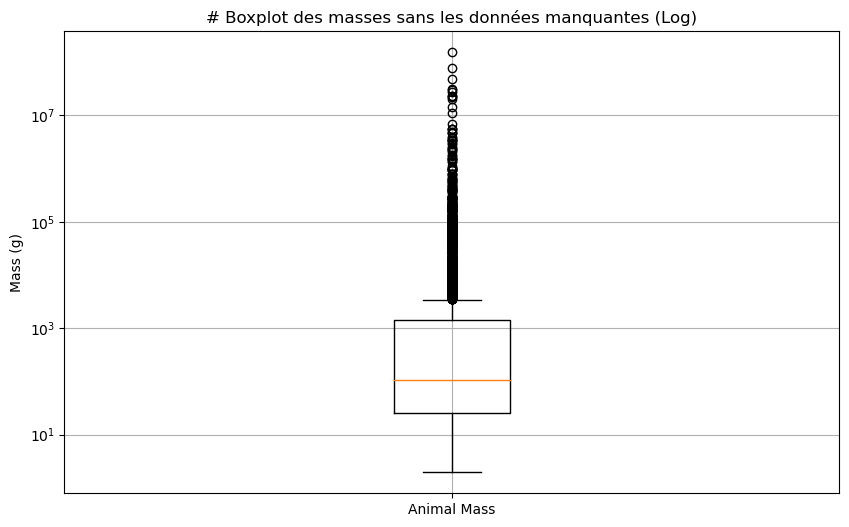

In [20]:
# Boxplot des masses sans les données manquantes

df = pd.read_csv("PanTHERIA_1-0_WR05_Aug2008.txt", sep="\t")
df_mass = df[['5-1_AdultBodyMass_g']].rename(columns={'5-1_AdultBodyMass_g': 'mass'})

df_mass_filtered = df_mass[df_mass["mass"] != -999.0]

plt.figure(figsize=(10, 6))
plt.boxplot(df_mass_filtered["mass"], vert=True)
plt.yscale('log') 
plt.title('# Boxplot des masses sans les données manquantes (Log)')
plt.ylabel('Mass (g)')
plt.xticks([1], ['Animal Mass'])
plt.grid(True)
plt.show()

*Description du graphique:*

la distribution des masses animales, avec des données représentées sur une échelle logarithmique.  
Dont:

- La boîte centrale illustre l'écart interquartile (EI), qui renferme les 50% de données centrales. Le bord inférieur de la boîte représente le premier quartile (Q1), et le bord supérieur indique le troisième quartile (Q3). <br>

- La ligne horizontale à l'intérieur de la boîte est la médiane, qui est la valeur médiane des données, divisant l'ensemble en deux parties de même effectif. <br>

- Les "moustaches" s'étendent de la boîte jusqu'aux plus petites et plus grandes valeurs non considérées comme des valeurs aberrantes. La longueur des moustaches est calculée en prenant 1,5 fois l'écart interquartile à partir des quartiles, mais dans la pratique, elles peuvent aussi simplement s'étendre jusqu'aux valeurs minimales et maximales observées, si celles-ci ne dépassent pas les limites des valeurs aberrantes. <br>

- Les points individuels situés au-dessus et en dessous des moustaches sont des valeurs aberrantes. Ils sont définis comme étant au-delà de 1,5 fois l'EI à partir du Q3 pour les points supérieurs et en dessous de Q1 pour les points inférieurs, indiquant des valeurs exceptionnellement élevées ou faibles par rapport au reste des données. <br>

src: <a href="https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214889-fra.html">Lecture d'une boite à moustache </a> et aide de chatgbt



<div class="alert alert-block alert-info">
<b>Corrections 1.1 - 1.2: </b> Points obtenus: /10
</div>

Remarques: 

### 1.3 Histogramme des masses corporelles

(5 points)

- Générez un histogramme des masses corporelles de tous les animaux.
- Générez un histogramme des masses corporelles des animaux atteignant un poids de *moins de 50 kilos* à l'age adulte. (pour plus de précision, spécifiez 30 bins pour l'histogramme). 

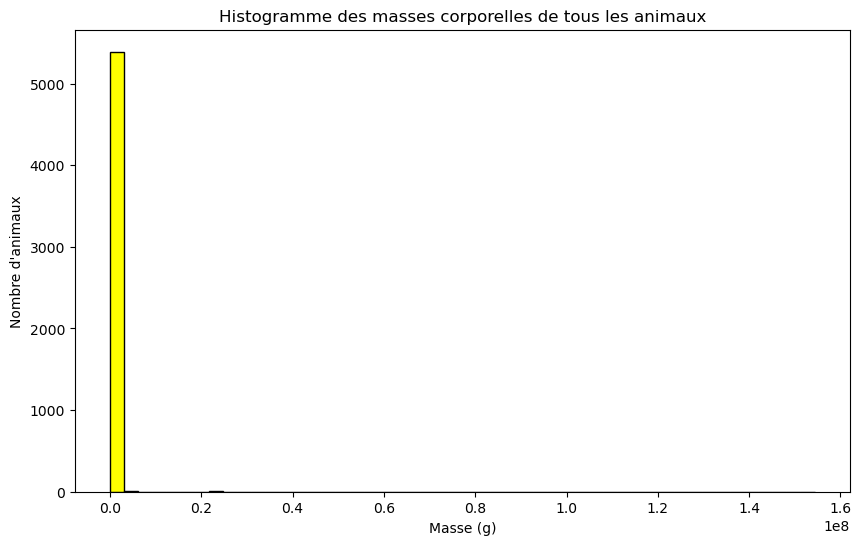

In [21]:
# Histogramme
df_clean_mass = df_mass.dropna()
# Histogramme de toutes les masses corporelles
plt.figure(figsize=(10,6))
plt.hist(df_clean_mass['mass'], bins=50, color='yellow', edgecolor='black')
plt.title("Histogramme des masses corporelles de tous les animaux")
plt.xlabel("Masse (g)")
plt.ylabel("Nombre d'animaux")
plt.show()

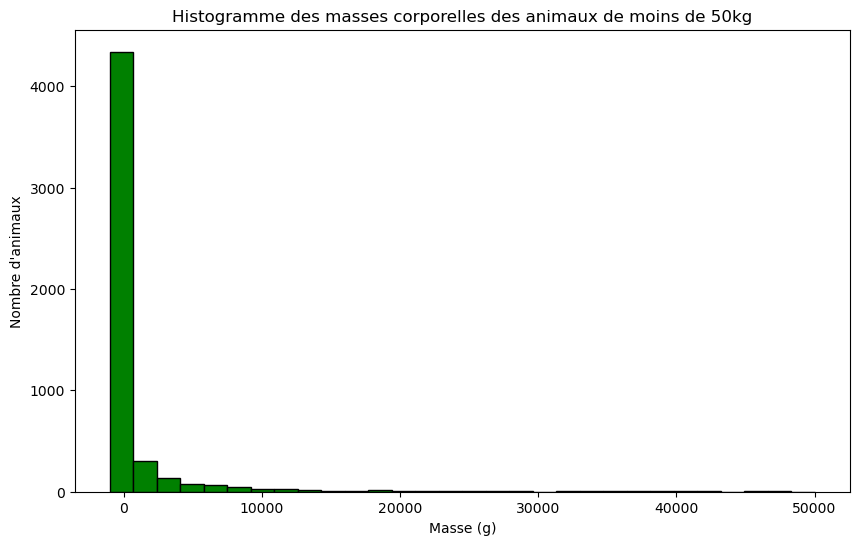

In [22]:
# Histogramme des animaux de <50 kg, 30 bins
plt.figure(figsize=(10,6))
plt.hist(df_clean_mass[df_clean_mass['mass'] < 50000]['mass'], bins=30, color='green', edgecolor='black')
plt.title("Histogramme des masses corporelles des animaux de moins de 50kg")
plt.xlabel("Masse (g)")
plt.ylabel("Nombre d'animaux")
plt.show()

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q3 </b></font> Que pouvez-vous conclure à partir de ces deux graphiques ? </p>



*Réponse...* <br>L'histogramme global montre que la majorité des animaux ont une masse corporelle petite, avec un pic très élevé pour les plus petites masses. <br>
L'histogramme pour les animaux de moins de 50 kg confirme cette tendance, avec une distribution marquée vers les plus petites masses. Conclusion la plupart des animaux dans ce dataset sont relativement petits en termes de masse corporelle.

<div class="alert alert-block alert-info">
<b>Corrections 1.3: </b> Points obtenus: /5
</div>

Remarques: 

### 1.4 Min et Max

(2 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q4 </b></font> Quel est le nom (binomial) de l'animal le plus léger ? et celui du plus lourd ?</p>



In [ ]:
idx_lightest = df['5-1_AdultBodyMass_g'].idxmin()
idx_heaviest = df['5-1_AdultBodyMass_g'].idxmax()

# Finding the index of the animal with the lowest g 
print({idx_lightest})
# Finding the index of the animal with the highest g 
print( {idx_heaviest})


# Extracting the details
lightest_animal = df.loc[idx_lightest, 'MSW05_Binomial']
# Extracting the details
heaviest_animal = df.loc[idx_heaviest, 'MSW05_Binomial']

print(f"Léger: {lightest_animal}")
print(f"Lourd: {heaviest_animal}")

*Src:*
<br>
link 1: <a href="https://machinelearningtutorials.org/pandas-idxmax-tutorial-with-examples/#:~:text=1,corresponding%20to%20the%20highest%20value">idxmax-tutorial</a> <br>
link 2: <a href ="https://www.geeksforgeeks.org/python-pandas-dataframe-loc/"> Localiser une donée précise </a> 

*Réponse:* <br>
**Le plus léger**: Craseonycteris thonglongyai <br>
**Le plus lourd**: Balaenoptera musculus

<div class="alert alert-block alert-info">
<b>Corrections 1.4: </b> Points obtenus: /2
</div>

Remarques: 

### 1.5 Choix perso

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q5 </b></font> Choisissez une autre variable/colonne du dataset et extrayez-en des informations.</p>


De cette colonne, produisez un graphique de votre choix (Boxplot, barplot, ...) et grâce aux fonctions connues, donnez un/des nombres intéressant en lien avec votre graphique (Moyenne, médiane, etc). Restez concis et utilisez deux cellules de code (une pour le graph et une pour les autres infos) et une cellule Markdown pour le résultat. 

*E.g. Barplot -> df.info() -> On voit que N % des animaux vivent en groupe de moins de M individus.* 

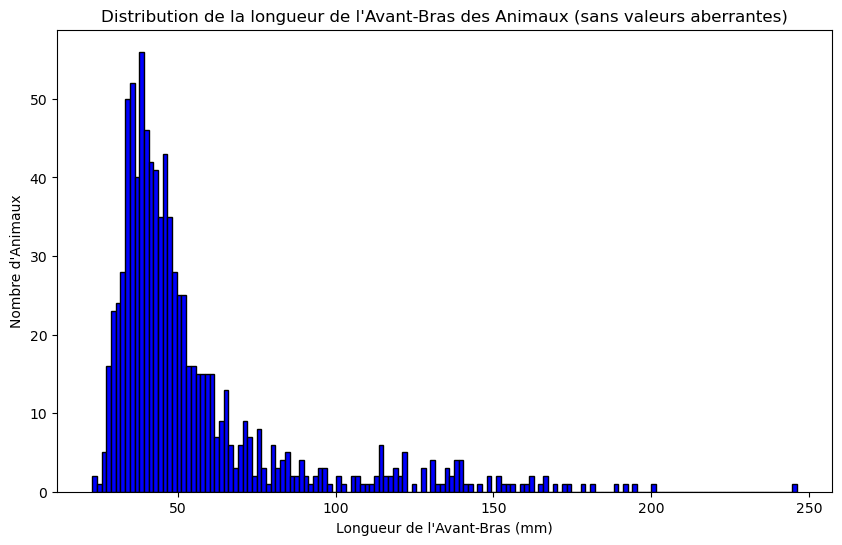

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer pour exclure les valeurs aberrantes (-999.0 ou valeurs négatives)
df_filtered = df[df['8-1_AdultForearmLen_mm'] > 0]

# Création d'un histogramme pour la longueur de l'avant-bras filtrée
plt.figure(figsize=(10,6))
plt.hist(df_filtered['8-1_AdultForearmLen_mm'], bins=150, color='blue', edgecolor='black')
plt.title("Distribution de la longueur de l'Avant-Bras des Animaux (sans valeurs aberrantes)")
plt.xlabel("Longueur de l'Avant-Bras (mm)")
plt.ylabel("Nombre d'Animaux")
plt.show()

In [ ]:
print(df_filtered['8-1_AdultForearmLen_mm'].describe())

***Nous parlons de la longeur de l'avant-bras pari les amimaux, voici les informations:*** <br><br>

**Count (Nombre total de mesures)** : 903 <br>

**Mean (moyenne des mesures)**: 54.95 mm <br>

**Standard Deviation (Écart-type)**: 30.48 mm <br>
*L'écart-type de 30.48 mm indique une variation relativement large de la longueur de l'avant-bras parmi les animaux, ce qui montre une différence significative de cette caractéristique physique.*<br>

**Min (taille minimum)** : 23.00 mm<br>

**50% (la Médiane)** : 44.94 mm<br> 
*La médiane, qui est la valeur centrale des données, est de 44.94 mm. Cela signifie que la moitié des animaux ont un avant-bras plus court que 44.94 mm et l'autre moitié plus long.* (src: chatgbt) <br> 

**Max (taille max)**: 246mm

***On conclut qu'entre les animaux nous avons une différence significative de leur longueur d'avant-bras***

<div class="alert alert-block alert-info">
<b>Corrections 1.5: </b> Points obtenus: /5
</div>

Remarques: 

---

## Exercice 2: Wine database - Analyse Exploratoire des données



Nous allons utiliser la base de données «Wine Data Set » disponible sur le dépôt de bases de données maintenu par l’Université de Californie à Irvine (UCI). Le lien direct est celui-ci : [http://archive.ics.uci.edu/ml/datasets/Wine?Quality].

### 2.1 Questions

(2 points)

Parcourez rapidement la page et répondez aux questions suivantes:


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q6 </b></font> Quelles informations contiennent ces données (brièvement) ? </p>

L'ensemble des données de la base de données "Wine Data Set" contient des informations chimiques sur des vins cultivés par 3 cultivateurs différents d'une même région d'Italie. L'étude détermine les quantités de 13 caractéristiques chimiques du vin trouvées sur 3 types de vin.

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q7 </b></font> Combien de colonnes y a-t-il ? </p>

On aperçoit que le dataset contient 178 obsérvations sur 13 variables différentes. Ces 13 variables correspondent aux caractéristiques chimiques du vin comme dit au-dessus. Elles correspondent aux colonnes du dataset. Voici un aperçu des différentes variables :

- Alcohol
- Malicacid
- Ash
- Alcalinity_of_ash
- Magnesium
- Total_phenols
- Flavanoids
- Nonflavanoid_phenols
- Proanthocyanins
- Color_intensity
- Hue
- 0D280_0D315_of_diluted_wines
- Proline

### 2.2 Lecture des données

(5 points)

Créez un DataFrame à partir du fichier **wine.data** et des noms de colonnes fournis, puis explorez rapidement les données. Ouvrez rapidement le fichier et observez les données pour voir leur structure et mieux comprendre la suite et posez-vous ces questions (pas besoin de noter une réponse): 

- *De quel manière sont stockées les données ?* 
- *Pourquoi on nous donne une liste de noms de colonne ?*

Chargez les données comme indiqué ci-dessous. Si vous le voulez vous pouvez directement charger ces données depuis Scikit-learn, à vous de trouver comment faire.

- Utilisez la fonction read_csv() pour lire le fichier **wine.data** et spécifiez le paramètre *names* en lui passant la liste donnée ci-dessous.

In [2]:
# Noms de colonnes 
dataFile = "wine.data"

headers = ['Class', 'Alcool', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
           'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
           'Hue', 'OD280/OD315 of diluted wines', 'Proline']

# Créez le dataset et nommez le "wines"
wines = pd.read_csv(dataFile, names=headers)
print(wines)

     Class  Alcool  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1   14.23        1.71  2.43               15.6        127   
1        1   13.20        1.78  2.14               11.2        100   
2        1   13.16        2.36  2.67               18.6        101   
3        1   14.37        1.95  2.50               16.8        113   
4        1   13.24        2.59  2.87               21.0        118   
..     ...     ...         ...   ...                ...        ...   
173      3   13.71        5.65  2.45               20.5         95   
174      3   13.40        3.91  2.48               23.0        102   
175      3   13.27        4.28  2.26               20.0        120   
176      3   13.17        2.59  2.37               20.0        120   
177      3   14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1            

- Explorez rapidement les données avec les fonctions habituelles pour récolter des informations (p.ex., nombre d’observations, de classes, d’attributs, statistiques des attributs, données manquantes).

In [3]:
# Explorez les données, ajoutez dautant de cellules que nécessaire.
wines.describe()

,Class,Alcool,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q8 </b></font> La colonne "Class" contient notre variable dépendante (variable de sortie / output). Combien de classes différentes y a-t-il et à quoi correspondent-elles ? A quelle position se trouve cette colonne dans le DataFrame ? Utilisez la cellule ci-dessous si nécessaire puis répondez textuellement. </p>
 

Aide: Utilisez la fonction *unique()* sur la colonne *Class* pour répondre à la première question.


In [4]:
# Q6: Ecrivez votre code ici: 
uniqueClass = wines['Class'].unique()
print(uniqueClass)
position = wines.columns.get_loc('Class')
print("La position de la colonne 'Class' se trouve en : ", position)

[1 2 3]
La position de la colonne 'Class' se trouve en :  0


La variable "Class" permet de définir de quel type de vin appartient l'échantillon correspondant. On remarque donc qu'il y a 3 types de vins. La position de cette variable se situe dans l'index 0 du DataFrame.

### 2.3 Boxplot groupé

(5 points)

Créez un boxplot pour chaque variables, groupées par Class.

Pour faire ceci, complétez le code ci-dessous en vous basant sur le pseudo code donné en commentaire entre les "------". N'utilisez que 2 lignes, une pour la boucle et une pour le graphique.

- Aide: Pour obtenir les noms de colonnes utilisez *wines.columns*. Pour obtenir i dans la boucle, en plus des noms de colonne, utilisez la fonction *enumerate*.
- Aide: Utilisez le [slicing](https://stackoverflow.com/questions/509211/understanding-slicing) pour obtenir tous les noms de colonne sauf Class (qui se trouve à une extrémité de la liste). 
- Aide: Utilisez la fonction [sns.boxplot de Seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html) pour un résultat élégant très coloré, ou la fonction [pandas.DataFrame.boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html) pour un résultat épuré en toute simplicité.


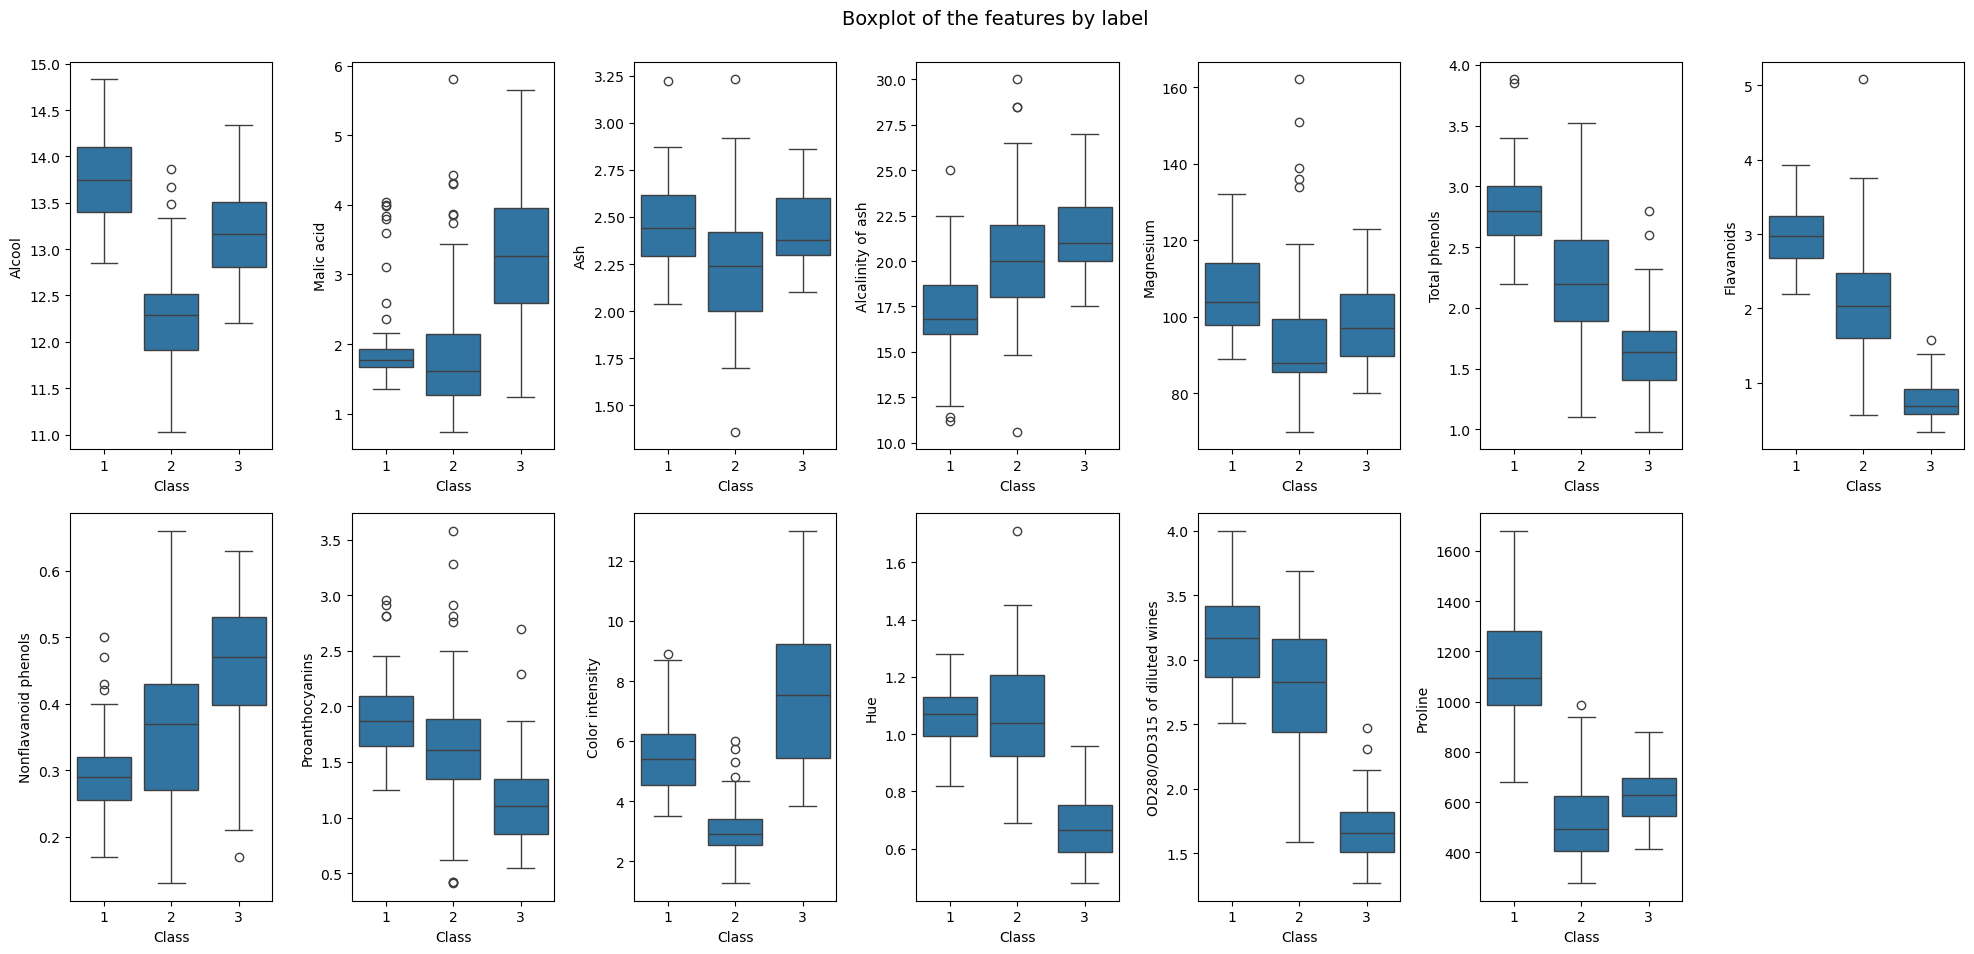

In [8]:
fig, axs = plt.subplots(2, 7, figsize=(20, 10)) # On spécifie le nombre de lignes et de colonnes de notre figure 
axs = axs.flatten() # -> 1D
for i, col in enumerate(wines.columns[1:]):
    sns.boxplot(x='Class', y=col, data=wines, ax=axs[i])
fig.suptitle('Boxplot of the features by label', fontsize=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.98])
fig.delaxes(axs[13]) # Supprime le plot vide en bas à droite

### 2.4 Analyse des graphiques

(5 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q9 </b></font> D'après les boxplots ci-dessus, quelles variables permettraient le mieux de distinguer/séparer les trois classes ? Et de distinguer une classe des deux autres ? Discutez les meilleures options et donnez les 4 meilleures variables, ainsi que les valeurs approximatives qui permettent de séparer les 3 classes. Justifiez et discutez votre choix. </p>

<p></p>
<div style="background-color:#EEEEEE;padding:3px">Note: un modèle peut permettre, avec des règles simples, de distinguer deux classes l'une de l'autre. Par exemple pour distinguer un chat d'un chien sur des valeurs numérique on pourrait avoir les règles suivantes: 

- Si $souplesse < 2$ et $poids > 10$ -> c'est un chien
- Sinon -> c'est un chat. 

Pour pouvoir établir ces règles, il faut donc avoir une vue sur les différentes variables. Ce n'est pas parfait mais le modèle reste simple. Il fonctionnera dans une bonne partie des cas mais on peut toujours tomber sur un Chihuahua souple de moins de 5 kilos par exemple. 
</div>

**Distinguer les trois classes**

Pour pouvoir au mieux distinguer les trois classes, il faudrait que les boxplot des différentes classes ne se chevauche le moins possible.

Voici les variables où les boxplots se chevauchent le moins :

- Flavanoids
- Alcool
- Total phenols

**Distinguer une classe des deux autres**

Pour différencier une classe des deux autres il faut que le boxplot de la classe que l'on veut distinguer ne se chevauchent pas avec les boxplots des deux autres classes.

Voici 5 variables qui permettent de différencier une classe parmis les autres :

- Flavanoids <br>
  Pour différencier la troisième classe
- 0D280_0D315_of_diluted_wines <br>
  Pour différencier la troisième classe
- Alcool <br>
  Pour différencier la deuxième classe
- Color intensity <br>
  Pour différencier la deuxième classe
- Proline <br>
  Pour différencier la première classe

**Liste des 4 meilleures variables :**

1. **Flavanoids**
  - Classe 1 : valeurs de ~2.8 à ~3.2
  - Classe 2 : valeurs de ~1.7 à ~2.5
  - Classe 3 : valeurs de ~1.5 à ~1.9
2. **Alcool**
  - Classe 1 : valeurs de ~13.4 à ~14.1
  - Classe 2 : valeurs de ~11.9 à ~12.5
  - Classe 3 : valeurs de ~12.8 à ~13.5
3. **Color intensity**
  - Classe 1 : valeurs de ~4.8 à ~6.1
  - Classe 2 : valeurs de ~2.9 à ~3.5
  - Classe 3 : valeurs de ~5.8 à ~9
4. **Proline**
  - Classe 1 : valeurs de ~1000 à ~1300
  - Classe 2 : valeurs de ~400 à ~600
  - Classe 3 : valeurs de ~580 à ~700
  
Les valeurs que j'ai cité ne comprennent que Q1 (premier quartile), la médiane et Q3 (troisième quartile). Les valeurs abberantes et minimum + maximum non abberant se sont pas pris en compte.

J'ai choisie ces variables en particulier, car elles semblent avoir des distributions qui sont plus distinctes entre les classes.

<div class="alert alert-block alert-info">
<b>Corrections 2.1-2.4: </b> Points obtenus: /17
</div>

Remarques: 

---

## Exercice 3: Introduction aux modèles à base de règles

(10 points)

Pour créer un modèle à base de règles (if-then-else) pour classifier les observations, vous utiliserez **une** des 3 variables choisies dans l'exercice 2 ci-dessus. Ce que l'on veut c'est des règles du type: si *composé A* > 12 alors class = 1, si *composé A* < 8 alors class = 2, sinon class = 3. Ceci peut-être étendu a plusieurs variables avec plus ou moins de conditions, mais gardons les choses simples pour cet exercice. 




<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q10 </b></font> Ajoutez au DataFrame wines (ou à une copie) une colone "pred" contenant les prédictions effectuées à l'aide d'une des variables choisies. Ecrivez-en le code ci-dessous. </p>



**Note:** Vous êtes libre de votre manière de faire mais le plus simple et de prévoir une fonction qui prend en entrée votre variable choisie et qui retourne la prédiction (1, 2 ou 3). Dans ce genre d'exercice, pour ajouter une colonne en fonction des valeurs d'une autre, la fonction *apply()* permet d'appliquer une fonction sur toutes les observations d'un Dataframe. Vous pouvez trouver quelques exemples [ici](https://sparkbyexamples.com/pandas/pandas-apply-function-to-every-row/). Ce sera utile pour plus tard ! 

In [9]:
# Q8
# Ecrivez votre code ici. 
def flavanoids_class(row):
    flavonoids = row['Flavanoids']
    if flavonoids >= 2.5:
        return 1
    elif flavonoids >= 1.5:
        return 2
    else:
        return 3

wines['pred'] = wines.apply(flavanoids_class, axis=1)
print(wines.iloc[:,[0, -1]])

     Class  pred
0        1     1
1        1     1
2        1     1
3        1     1
4        1     1
..     ...   ...
173      3     3
174      3     3
175      3     3
176      3     3
177      3     3

[178 rows x 2 columns]


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q11 </b></font> Calculez et affichez la proportion de prédiction correcte (Accuracy) de votre modèle. Faites la matrice de confusion.</p>

**Note:** Vous pouvez faire la matrice de confusion en python ou à la main (dans le sens textuel). 


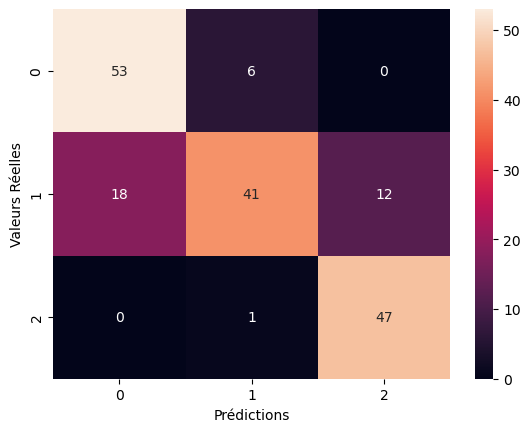

Précision des prédicitions : 79.21348314606742%


In [10]:
# Q9
# Ecrivez votre code ici.
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

true_labels = wines['Class']
pred_labels = wines['pred']
conf_matrix = confusion_matrix(true_labels, pred_labels)

sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()
accuracy = accuracy_score(true_labels, pred_labels)
print(f'Précision des prédicitions : {accuracy * 100}%')

On aperçoit qu'en faisant la matrice de confusion, il y a eu 6 données qui ont été prédis dans la classe 2 aulieu de la classe 1, 18 données en classe 1 et 12 données en classe 3 pour la classe 2 et seulement 1 donnée qui a été mise dans la classe 2 pour la troisième classe.

Pour obtenir la proportion de prédiction en pourcentage, j'ai additionner le nombre de prédictions correctes et ensuite j'ai divisé ce nombre par le nombre total de prédictions et je l'ai multiplié par 100. J'obtiens donc une précision de ~79%


---
<div class="alert alert-block alert-info">
<b>Corrections Ex 3: </b> Points obtenus: /10
</div>

Remarques: 

FIN